In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
construction_permits_df = pd.read_csv('/home/oem/machine_learning_jupyter/Issued_Construction_Permits.csv', low_memory=False)

In [10]:
construction_permits_df.head(100)

,Permit Type,Permit Type Desc,Permit Num,Permit Class Mapped,Permit Class,Work Class,Condominium,Project Name,Description,TCAD ID,...,Contractor Zip,Applicant Full Name,Applicant Organization,Applicant Phone,Applicant Address 1,Applicant Address 2,Applicant City,Applicant Zip,Certificate Of Occupancy,Total Lot SQFT
0,PP,Plumbing Permit,2023-018509 PP,Commercial,Commercial,New,No,12733 TESLA ROAD,Natural Gas for Die Cast Machines 50000 sqft n...,0315410104,...,78704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1,EP,Electrical Permit,1982-011708 EP,Commercial,NaN,New,No,7221 Mc Neil Road A 00004,Mobile Home,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
2,DS,Driveway / Sidewalks,2007-110431 DS,Residential,Res. Driveway & Sidewalk,New,NaN,1513 ACACIA BUD DR,new two story sf res w/ attached garage covd p...,0123480213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DS,Driveway / Sidewalks,2007-111834 DS,Residential,Res. Driveway & Sidewalk,New,NaN,5304 ENGLISH GLADE DR,SMART HOUSING,0209380302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PP,Plumbing Permit,2007-112862 PP,Residential,Residential,Irrigation,No,1001 W HOWARD LN,Install backflow prev for irrigation system,0264260101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,PP,Plumbing Permit,2009-002352 PP,Residential,Residential,Irrigation,No,8425 SHALLOT WAY,Installing irrigation to existing residence only,0428090712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
96,PP,Plumbing Permit,2009-003062 PP,Residential,Residential,Irrigation,No,832 WALNUT CREEK DR,Installing irrigation to existing residence only,0252260704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
97,PP,Plumbing Permit,2009-003432 PP,Residential,Residential,Irrigation,No,7916 TEXAS PLUME RD,Install irrigation system to new resid outside...,0164091835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
98,EP,Electrical Permit,2009-007724 EP,Commercial,Sign Permit,Wall,No,5210 S IH 35 SVRD SB,Wall sign for South Point,0416030403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN


In [8]:
# Calculate the number of null values in each column
null_counts = construction_permits_df.isnull().sum()

# Display columns with null values
print("Columns with their respective null values:")
print(null_counts[null_counts > 0])

Columns with their respective null values:
Permit Type Desc                 3
Permit Num                       3
Permit Class Mapped              3
Permit Class                   916
Work Class                     838
                             ...  
Applicant Address 2         402048
Applicant City              395633
Applicant Zip               398820
Certificate Of Occupancy     21491
Total Lot SQFT              452209
Length: 67, dtype: int64


# Data Cleaning

In [ ]:
# Convert 'Permit Type Desc' to category dtype if it's categorical
construction_permits_df['Permit Type Desc'] = construction_permits_df['Permit Type Desc'].astype('category')

# Forward fill and backward fill within each group
filled_df = construction_permits_df.groupby('Project Name').apply(lambda x: x.ffill().bfill())

# Reset the index to align with the original DataFrame
filled_df.reset_index(drop=True, inplace=True)

# Assign the filled data back to the original DataFrame
construction_permits_df['Permit Type Desc'] = filled_df['Permit Type Desc']

# Check remaining missing values
remaining_missing = construction_permits_df['Permit Type Desc'].isnull().sum()
print("Remaining missing values in 'Permit Type Desc':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Permit Type Desc'].mode()[0]
    construction_permits_df['Permit Type Desc'] = construction_permits_df['Permit Type Desc'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Permit Type Desc' after final filling:", construction_permits_df['Permit Type Desc'].isnull().sum())



In [8]:
# Convert 'Permit Class Mapped' to category dtype if it's categorical
construction_permits_df['Permit Class Mapped'] = construction_permits_df['Permit Class Mapped'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby('Permit Type Desc')['Permit Class Mapped']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Permit Class Mapped'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Permit Class Mapped'].isnull().sum()
print("Remaining missing values in 'Permit Class Mapped':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Permit Class Mapped'].mode()[0]
    construction_permits_df['Permit Class Mapped'] = construction_permits_df['Permit Class Mapped'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Permit Class Mapped' after final filling:", construction_permits_df['Permit Class Mapped'].isnull().sum())


Remaining missing values in 'Permit Class Mapped': 3
Missing values in 'Permit Class Mapped' after final filling: 0


In [11]:
# Convert 'Permit Class Mapped' to category dtype if it's categorical
construction_permits_df['Permit Class'] = construction_permits_df['Permit Class'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby('Permit Type Desc')['Permit Class']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Permit Class'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Permit Class'].isnull().sum()
print("Remaining missing values in 'Permit Class':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Permit Class'].mode()[0]
    construction_permits_df['Permit Class'] = construction_permits_df['Permit Class'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Permit Class' after final filling:", construction_permits_df['Permit Class'].isnull().sum())

Remaining missing values in 'Permit Class': 3
Missing values in 'Permit Class' after final filling: 0


In [4]:
# Convert 'Work Class' to category dtype if it's categorical
construction_permits_df['Work Class'] = construction_permits_df['Work Class'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby('Project Name')['Work Class']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Work Class'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Work Class'].isnull().sum()
print("Remaining missing values in 'Work Class':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Work Class'].mode()[0]
    construction_permits_df['Work Class'] = construction_permits_df['Work Class'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Work Class' after final filling:", construction_permits_df['Work Class'].isnull().sum())

Remaining missing values in 'Work Class': 814
Missing values in 'Work Class' after final filling: 0




#### I have decided to use fillna() in filling out the condominium column because the value in the column 'Permit Class Mapped' relates to the 'condominium', which is it's either residential or commercial, hence using yes to show it is a condominium which is residential property, not a residential property.

#### Panda does not support using 'yes' in fillna(), hence I have added 'yes' to the categories of the 'Condominium' column if it’s not already present, then apply fillna('yes').


In [9]:

# Convert 'Condominium' to category dtype if it's categorical
construction_permits_df['Condominium'] = construction_permits_df['Condominium'].astype('category')

# Ensure 'yes' is a category in the 'Condominium' column
categories = construction_permits_df['Condominium'].cat.categories
if 'yes' not in categories:
    # Add 'yes' to categories
    construction_permits_df['Condominium'] = construction_permits_df['Condominium'].cat.add_categories('yes')

# Fill missing values within each group with 'yes'
construction_permits_df['Condominium'] = (construction_permits_df
                                           .groupby('Permit Class Mapped')['Condominium']
                                           .transform(lambda x: x.fillna('yes')))

# Check remaining missing values
remaining_missing = construction_permits_df['Condominium'].isnull().sum()
print("Remaining missing values in 'Condominium':", remaining_missing)

# Verify missing values after all processing
print("Missing values in 'Condominium' after final filling:", construction_permits_df['Condominium'].isnull().sum())




Remaining missing values in 'Condominium': 3
Missing values in 'Condominium' after final filling: 3




#### In the column 'Project Name', I am using 'Permit Class' to groupby() and fill() and bfill() because the street name will change depending on whether the project is commercial or residential

In [11]:
# Convert 'Project Name' to category dtype if it's categorical
construction_permits_df['Project Name'] = construction_permits_df['Project Name'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby('Permit Class')['Project Name']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Project Name'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Project Name'].isnull().sum()
print("Remaining missing values in 'Project Name':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Project Name'].mode()[0]
    construction_permits_df['Project Name'] = construction_permits_df['Project Name'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Project Name' after final filling:", construction_permits_df['Project Name'].isnull().sum())

Remaining missing values in 'Project Name': 916
Missing values in 'Project Name' after final filling: 0




#### In this column, 'Property Legal Description', I have used two coumns to groupby(), because different laws may vary given the permit class issued, be it 'residential' or 'commercial'.

In [14]:

# Convert 'Property Legal Description' to category dtype if it's categorical
construction_permits_df['Property Legal Description'] = construction_permits_df['Property Legal Description'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby(['Project Name', 'Permit Class Mapped'], observed=False)['Property Legal Description']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Property Legal Description'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Property Legal Description'].isnull().sum()
print("Remaining missing values in 'Property Legal Description':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Property Legal Description'].mode()[0]
    construction_permits_df['Property Legal Description'] = construction_permits_df['Property Legal Description'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Property Legal Description' after final filling:", construction_permits_df['Property Legal Description'].isnull().sum())


Remaining missing values in 'Property Legal Description': 3
Missing values in 'Property Legal Description' after final filling: 0




#### In the column 'description', I am using the column 'Permit Class' because the kind of construction is either residential or commercial

In [15]:
# Convert 'Description' to category dtype if it's categorical
construction_permits_df['Description'] = construction_permits_df['Description'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby('Permit Class')['Description']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Description'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Description'].isnull().sum()
print("Remaining missing values in 'Description':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Description'].mode()[0]
    construction_permits_df['Description'] = construction_permits_df['Description'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Description' after final filling:", construction_permits_df['Description'].isnull().sum())

Remaining missing values in 'Description': 916
Missing values in 'Description' after final filling: 0




#### I am using 'Calendar Year Issued' to fill null values in the column 'Expires Date'

In [4]:
# Convert 'Expires Date' to category dtype if it's categorical
construction_permits_df['Expires Date'] = construction_permits_df['Expires Date'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby('Calendar Year Issued')['Expires Date']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Expires Date'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Expires Date'].isnull().sum()
print("Remaining missing values in 'Expires Date':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Expires Date'].mode()[0]
    construction_permits_df['Expires Date'] = construction_permits_df['Expires Date'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Expires Date' after final filling:", construction_permits_df['Expires Date'].isnull().sum())

Remaining missing values in 'Expires Date': 3
Missing values in 'Expires Date' after final filling: 0




#### For the column 'Completed Date', I am using groupby() with two columns 'Fiscal Year Issued' & 'Status Date'

In [5]:
# Convert 'Expires Date' to category dtype if it's categorical
construction_permits_df['Completed Date'] = construction_permits_df['Completed Date'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby(['Fiscal Year Issued', 'Status Date'], observed=False)['Completed Date']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Completed Date'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Completed Date'].isnull().sum()
print("Remaining missing values in 'Completed Date':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Completed Date'].mode()[0]
    construction_permits_df['Completed Date'] = construction_permits_df['Completed Date'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Completed Date' after final filling:", construction_permits_df['Completed Date'].isnull().sum())

Remaining missing values in 'Completed Date': 12244
Missing values in 'Completed Date' after final filling: 0




#### By filling in the column 'Original City', I am using groupby() with the column 'Original Address 1' & 'Project Name' since each address is unique to each city.

In [6]:
# Convert 'Original City' to category dtype if it's categorical
construction_permits_df['Original City'] = construction_permits_df['Original City'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby(['Original Address 1', 'Project Name'], observed=False)['Original City']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Original City'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Original City'].isnull().sum()
print("Remaining missing values in 'Original City':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Original City'].mode()[0]
    construction_permits_df['Original City'] = construction_permits_df['Original City'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Original City' after final filling:", construction_permits_df['Original City'].isnull().sum())

Remaining missing values in 'Original City': 1200
Missing values in 'Original City' after final filling: 0





#### The 'Jurisdiction' column will use groupby() using the column 'Original City'

In [8]:
# Convert 'Jurisdiction' to category dtype if it's categorical
construction_permits_df['Jurisdiction'] = construction_permits_df['Jurisdiction'].astype('category')

# Forward fill and backward fill within each group
# Specify observed=False to avoid the FutureWarning
filled_df = (construction_permits_df
             .groupby('Original City', observed=False)['Jurisdiction']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Jurisdiction'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Jurisdiction'].isnull().sum()
print("Remaining missing values in 'Jurisdiction':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Jurisdiction'].mode()[0]
    construction_permits_df['Jurisdiction'] = construction_permits_df['Jurisdiction'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Jurisdiction' after final filling:", construction_permits_df['Jurisdiction'].isnull().sum())

print("Missing values in 'Jurisdiction' after final filling:", construction_permits_df['Jurisdiction'].isnull().sum())

Remaining missing values in 'Jurisdiction': 0
Missing values in 'Jurisdiction' after final filling: 0
Missing values in 'Jurisdiction' after final filling: 0




#### Contractor Trade

In [9]:
# Convert 'Contractor Trade' to category dtype if it's categorical
construction_permits_df['Contractor Trade'] = construction_permits_df['Contractor Trade'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby('Permit Type Desc')['Contractor Trade']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Contractor Trade'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Contractor Trade'].isnull().sum()
print("Remaining missing values in 'Contractor Trade':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Contractor Trade'].mode()[0]
    construction_permits_df['Contractor Trade'] = construction_permits_df['Contractor Trade'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Contractor Trade' after final filling:", construction_permits_df['Contractor Trade'].isnull().sum())

Remaining missing values in 'Contractor Trade': 3
Missing values in 'Contractor Trade' after final filling: 0




#### Contractor Company Name

In [11]:
# Convert 'Contractor Company Name' to category dtype if it's categorical
construction_permits_df['Contractor Company Name'] = construction_permits_df['Contractor Company Name'].astype('category')

# Check if 'Location' column exists and has values
if 'Location' not in construction_permits_df.columns:
    raise ValueError("The 'Location' column is not found in the DataFrame.")

# Forward fill and backward fill within each group
filled_df = (construction_permits_df
             .groupby('Location')['Contractor Company Name']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Contractor Company Name'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Contractor Company Name'].isnull().sum()
print("Remaining missing values in 'Contractor Company Name':", remaining_missing)

# Debugging: Check some of the missing values and their locations
print("Sample missing values:")
print(construction_permits_df[construction_permits_df['Contractor Company Name'].isnull()]['Location'].head())

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Contractor Company Name'].mode()[0]
    # Fix: Use the correct column for filling
    construction_permits_df['Contractor Company Name'] = construction_permits_df['Contractor Company Name'].fillna(mode_value)

# Verify missing values after all processing
final_missing = construction_permits_df['Contractor Company Name'].isnull().sum()
print("Missing values in 'Contractor Company Name' after final filling:", final_missing)


Remaining missing values in 'Contractor Company Name': 26519
Sample missing values:
1                             NaN
6     (30.26540717, -97.73299878)
9     (30.26161095, -97.76116589)
10    (30.30568888, -97.73178659)
11    (30.28563024, -97.74671493)
Name: Location, dtype: object
Missing values in 'Contractor Company Name' after final filling: 0




#### Contractor Full Name

In [13]:
# Convert 'Contractor Trade' to category dtype if it's categorical
construction_permits_df['Contractor Full Name'] = construction_permits_df['Contractor Full Name'].astype('category')

# Forward fill and backward fill within each group
# Use .transform() to fill missing values
filled_df = (construction_permits_df
             .groupby('Project Name')['Contractor Full Name']
             .transform(lambda x: x.ffill().bfill()))

# Assign the filled data back to the original DataFrame
construction_permits_df['Contractor Full Name'] = filled_df

# Check remaining missing values
remaining_missing = construction_permits_df['Contractor Full Name'].isnull().sum()
print("Remaining missing values in 'Contractor Full Name':", remaining_missing)

if remaining_missing > 0:
    # Use mode or a placeholder value for categorical data
    mode_value = construction_permits_df['Contractor Full Name'].mode()[0]
    construction_permits_df['Contractor Full Name'] = construction_permits_df['Contractor Full Name'].fillna(mode_value)

# Verify missing values after all processing
print("Missing values in 'Contractor Full Name' after final filling:", construction_permits_df['Contractor Full Name'].isnull().sum())

Remaining missing values in 'Contractor Full Name': 16071
Missing values in 'Contractor Full Name' after final filling: 0




## Dropping Columns with unique values

In [14]:
construction_permits_df = construction_permits_df.drop(columns=['Permit Num',
                                                               'TCAD ID',
                                                               'Applied Date',
                                                               'Issued Date',
                                                               'Original Zip',
                                                               'Council District',
                                                               'Project ID',
                                                               'Master Permit Num',
                                                               'Contractor Phone',
                                                               'Contractor Zip',])


In [17]:
construction_permits_df.head(30)

,Permit Type,Permit Type Desc,Permit Num,Permit Class Mapped,Permit Class,Work Class,Condominium,Project Name,Description,TCAD ID,...,Contractor Zip,Applicant Full Name,Applicant Organization,Applicant Phone,Applicant Address 1,Applicant Address 2,Applicant City,Applicant Zip,Certificate Of Occupancy,Total Lot SQFT
0,PP,Plumbing Permit,2023-018509 PP,Commercial,Commercial,New,No,12733 TESLA ROAD,Natural Gas for Die Cast Machines 50000 sqft n...,0315410104,...,78704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1,EP,Electrical Permit,1982-011708 EP,Commercial,NaN,New,No,7221 Mc Neil Road A 00004,Mobile Home,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
2,DS,Driveway / Sidewalks,2007-110431 DS,Residential,Res. Driveway & Sidewalk,New,NaN,1513 ACACIA BUD DR,new two story sf res w/ attached garage covd p...,0123480213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DS,Driveway / Sidewalks,2007-111834 DS,Residential,Res. Driveway & Sidewalk,New,NaN,5304 ENGLISH GLADE DR,SMART HOUSING,0209380302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PP,Plumbing Permit,2007-112862 PP,Residential,Residential,Irrigation,No,1001 W HOWARD LN,Install backflow prev for irrigation system,0264260101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
5,EP,Electrical Permit,2007-114343 EP,Residential,Residential,Remodel,No,2719 YANDALL DR,LIGHTING FOR ROD IRON FENCE,0436301603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
6,EP,Electrical Permit,2007-117468 EP,Commercial,Sign Permit,Wall,No,900 E 6TH ST UNIT 101,Wall Sign Urban Axis Mortgage -South elevation,0206051401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
7,DS,Driveway / Sidewalks,2007-117738 DS,Residential,Res. Driveway & Sidewalk,New,NaN,7508 JABORANDI DR,New 2 story sf res. att garage covd patio.,0426530306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,DS,Driveway / Sidewalks,2007-120108 DS,Residential,Res. Driveway & Sidewalk,New,NaN,7600 ESPINA DR,Construct new residential driveway approach & ...,0426550602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,EP,Electrical Permit,2007-121392 EP,Commercial,Sign Permit,Wall,No,1525 BARTON SPRINGS RD,Wall sign Valero logo,0103030753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN


# Encoding

### One-Hot Encoding
### Explanation of Choices:
#### Permit Type Desc: Encoded to capture the type of permit.
#### Permit Class Mapped: Encoded to capture the mapped permit class.
#### Permit Class: Encoded to capture detailed permit class information.
#### Work Class: Encoded to capture the type of work related to the permit.
#### Condominium: Encoded as it is a binary categorical feature (Yes/No).
### Advantages of One-Hot Encoding:
#### Avoids Ordinal Bias: This method does not assume any ordinal relationship among categories, which is suitable for non-ordinal categorical variables.
### Limitations of One-Hot Encoding:
#### High Dimensionality: For features with many unique categories, one-hot encoding can create a large number of additional columns, which may impact model performance and computational efficiency.

In [5]:

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(construction_permits_df, columns=['Permit Type Desc', 'Permit Class Mapped', 'Permit Class', 'Work Class', 'Condominium'])


## Target Encoding
### Description: Replace each category in a categorical feature with the average value of the target variable for that category. This encoding captures the relationship between the categorical feature and the target variable.

### Explanation of the Code:
#### Synthetic Target Variable: Added a target variable based on the Permit Class to demonstrate target encoding. This variable indicates whether the permit is Residential (1) or not (0).

#### Target Encoding Function: Created a function target_encode that computes the mean of the target variable for each category of a given feature and maps these means to the feature’s categories.

#### Apply Encoding: Used the target_encode function to encode the categorical features based on the target variable.

### Advantages of Target Encoding:
#### Captures Relationships: Effectively captures the relationship between categorical features and the target variable.
#### Reduces Dimensionality: Avoids the high dimensionality issue of one-hot encoding for features with many unique categories.

### Limitations of Target Encoding:
#### Requires Careful Validation: Proper cross-validation is needed to ensure the encoding does not lead to data leakage.

In [26]:

# Add a synthetic target variable for demonstration purposes
construction_permits_df['Target'] = [1 if 'Residential' in x else 0 for x in construction_permits_df['Permit Class']]

# Perform Target Encoding
def target_encode(construction_permits_df, feature, target):
    mean_target = construction_permits_df.groupby(feature)[target].mean()
    construction_permits_df[f'{feature}_encoded'] = construction_permits_df[feature].map(mean_target)
    return construction_permits_df

# Apply Target Encoding
df_encoded = target_encode(construction_permits_df, 'Permit Type Desc', 'Target')
df_encoded = target_encode(df_encoded, 'Permit Class Mapped', 'Target')
df_encoded = target_encode(df_encoded, 'Permit Class', 'Target')
df_encoded = target_encode(df_encoded, 'Work Class', 'Target')
df_encoded = target_encode(df_encoded, 'Condominium', 'Target')

print(df_encoded.head())

  Permit Type      Permit Type Desc      Permit Num Permit Class Mapped  \
0          PP       Plumbing Permit  2023-018509 PP          Commercial   
1          EP     Electrical Permit  1982-011708 EP          Commercial   
2          DS  Driveway / Sidewalks  2007-110431 DS         Residential   
3          DS  Driveway / Sidewalks  2007-111834 DS         Residential   
4          PP       Plumbing Permit  2007-112862 PP         Residential   

               Permit Class  Work Class Condominium  \
0                Commercial         New          No   
1                   Unknown         New          No   
2  Res. Driveway & Sidewalk         New     Unknown   
3  Res. Driveway & Sidewalk         New     Unknown   
4               Residential  Irrigation          No   

                                  Project Name  \
0                             12733 TESLA ROAD   
1  7221 Mc Neil Road                  A  00004   
2                           1513 ACACIA BUD DR   
3                 

## Frequency Encoding
### Description: Replace each category in a categorical feature with the number of times it appears in the dataset.

### Advantages:
#### Simplicity: Easy to implement and understand.
#### Handles High Cardinality: Works well with high-cardinality features as it does not increase the dimensionality of the dataset.

### Limitations:
#### Loss of Information: Frequency encoding may not capture the relationship between the categorical feature and the target variable.
#### Assumes Order: Assumes that higher frequencies are more significant, which might not always be true.


In [27]:

# Perform Frequency Encoding
def frequency_encode(construction_permits_df, feature):
    frequency = construction_permits_df[feature].value_counts()
    construction_permits_df[f'{feature}_encoded'] = construction_permits_df[feature].map(frequency)
    return construction_permits_df

# Apply Frequency Encoding
df_encoded = frequency_encode(construction_permits_df, 'Permit Type Desc')
df_encoded = frequency_encode(df_encoded, 'Permit Class Mapped')
df_encoded = frequency_encode(df_encoded, 'Permit Class')
df_encoded = frequency_encode(df_encoded, 'Work Class')
df_encoded = frequency_encode(df_encoded, 'Condominium')

print(df_encoded.head())

  Permit Type      Permit Type Desc      Permit Num Permit Class Mapped  \
0          PP       Plumbing Permit  2023-018509 PP          Commercial   
1          EP     Electrical Permit  1982-011708 EP          Commercial   
2          DS  Driveway / Sidewalks  2007-110431 DS         Residential   
3          DS  Driveway / Sidewalks  2007-111834 DS         Residential   
4          PP       Plumbing Permit  2007-112862 PP         Residential   

               Permit Class  Work Class Condominium  \
0                Commercial         New          No   
1                   Unknown         New          No   
2  Res. Driveway & Sidewalk         New     Unknown   
3  Res. Driveway & Sidewalk         New     Unknown   
4               Residential  Irrigation          No   

                                  Project Name  \
0                             12733 TESLA ROAD   
1  7221 Mc Neil Road                  A  00004   
2                           1513 ACACIA BUD DR   
3                 

## Binary Encoding
### Description: Binary encoding converts categorical variables into binary codes. Each category is first assigned a unique integer, and then this integer is converted to binary. Each binary digit is then encoded into separate columns.

### Advantages:
#### Efficient Representation: Reduces the dimensionality compared to one-hot encoding, especially for high-cardinality features.
#### Maintains Information: Captures the ordinal relationship between categories if present.

### Limitations:
#### Complexity: More complex than label encoding but less interpretable than one-hot encoding.
#### Dimensionality: Number of binary columns increases with the number of categories but is less than one-hot encoding.


In [29]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [32]:

# Perform Binary Encoding
encoder = ce.BinaryEncoder(cols=['Permit Type Desc', 'Permit Class Mapped', 'Permit Class', 'Work Class', 'Condominium'])
df_encoded = encoder.fit_transform(construction_permits_df)

print(df_encoded.head())

  Permit Type  Permit Type Desc_0  Permit Type Desc_1  Permit Type Desc_2  \
0          PP                   0                   0                   1   
1          EP                   0                   1                   0   
2          DS                   0                   1                   1   
3          DS                   0                   1                   1   
4          PP                   0                   0                   1   

       Permit Num  Permit Class Mapped_0  Permit Class Mapped_1  \
0  2023-018509 PP                      0                      1   
1  1982-011708 EP                      0                      1   
2  2007-110431 DS                      1                      0   
3  2007-111834 DS                      1                      0   
4  2007-112862 PP                      1                      0   

   Permit Class_0  Permit Class_1  Permit Class_2  ...  Contractor Zip  \
0               0               0               0  ...      

# Cardianlity

### Grouping Rare Categories:

### Interpretability: Simplifies the data by reducing the number of categories, making it easier to interpret and analyze.
#### Performance: Helps in reducing dimensionality and potential overfitting. Can improve model performance by focusing on more significant categories.

### Feature Binning:
#### Interpretability: Makes features more understandable by grouping similar types into broader categories.
#### Performance: Reduces the number of features and complexity, which can improve model efficiency and generalization.

### Combining Similar Categories:
#### Interpretability: Creates a more coherent feature set by merging redundant categories.
#### Performance: Helps in reducing feature space and improving model robustness by minimizing noise from less informative categories.

In [33]:
# Identify High-Cardinality Features

# Check unique values and cardinality for categorical features
categorical_features = ['Permit Type Desc', 'Permit Class Mapped', 'Permit Class', 'Work Class', 'Condominium']

for feature in categorical_features:
    unique_count = construction_permits_df[feature].nunique()
    print(f"Feature: {feature}, Unique Values: {unique_count}")
# Output will give us an idea of high-cardinality features

Feature: Permit Type Desc, Unique Values: 5
Feature: Permit Class Mapped, Unique Values: 2
Feature: Permit Class, Unique Values: 64
Feature: Work Class, Unique Values: 27
Feature: Condominium, Unique Values: 2


### Feature Binning


In [35]:
##Description: Combine similar categories into broader bins. 
## For example, if 'Work Class' contains specific types, group them into broader categories like 'Construction', 'Maintenance',

# Example of feature binning for 'Work Class'
def bin_features(construction_permits_df, feature, bins):
    construction_permits_df[feature] = construction_permits_df[feature].map(bins).fillna('Other')
    return construction_permits_df

work_class_bins = {
    'New': 'Construction',
    'Irrigation': 'Maintenance',
    'Remodel': 'Construction',
    'Wall': 'Construction',
    'Fireline': 'Fire',
    'Repair': 'Maintenance'
}

df_binned = bin_features(construction_permits_df.copy(), 'Work Class', work_class_bins)
print(df_binned['Work Class'].value_counts())


Work Class
Construction    337602
Other            97432
Maintenance      53753
Fire              1240
Name: count, dtype: int64


### Grouping Rare Categories


In [34]:
# Explore Techniques to Reduce Cardinality

## Description: Group infrequent categories into a single "Other" category to reduce the number of unique values.
# Group rare categories for 'Permit Class' feature as an example

def group_rare_categories(construction_permits_df, feature, threshold=0.05):
    value_counts = construction_permits_df[feature].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index
    construction_permits_df[feature] = construction_permits_df[feature].replace(rare_categories, 'Other')
    return construction_permits_df

df_reduced = group_rare_categories(construction_permits_df.copy(), 'Permit Class', threshold=0.1)
print(df_reduced['Permit Class'].value_counts())


Permit Class
Other                          211594
Residential                    138092
R- 101 Single Family Houses     73298
C-1000 Commercial Remodel       67043
Name: count, dtype: int64


### Combining Similar Categories


In [36]:
## Description: If some categories are semantically similar or redundant, combine them into a single category.

# Combine similar categories for 'Permit Type Desc'
def combine_similar_categories(construction_permits_df, feature, mapping):
    construction_permits_df[feature] = construction_permits_df[feature].map(mapping).fillna(construction_permits_df[feature])
    return construction_permits_df

permit_type_mapping = {
    'Plumbing Permit': 'Plumbing',
    'Electrical Permit': 'Electrical',
    'Driveway / Sidewalks': 'Driveway/Sidewalks'
}

df_combined = combine_similar_categories(construction_permits_df.copy(), 'Permit Type Desc', permit_type_mapping)
print(df_combined['Permit Type Desc'].value_counts())



Permit Type Desc
Electrical            136628
Plumbing              120462
Building Permit       118934
Mechanical Permit      93003
Driveway/Sidewalks     21000
Name: count, dtype: int64


# Data Visualization

### 1. Bar Plot of Categorical Feature Frequencies

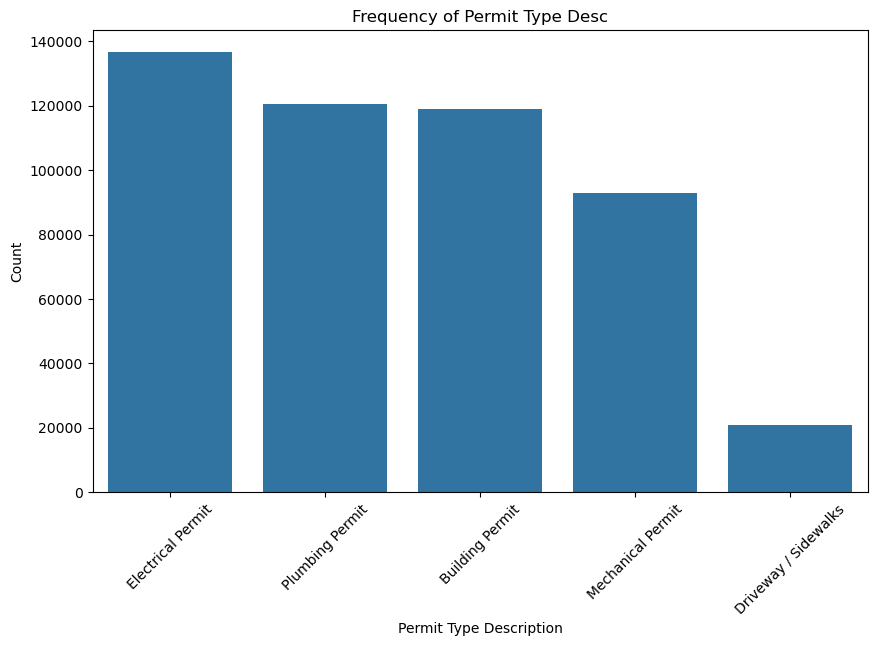

In [40]:
# Bar Plot for 'Permit Type Desc'
plt.figure(figsize=(10, 6))
sns.countplot(data=construction_permits_df, x='Permit Type Desc', order=construction_permits_df['Permit Type Desc'].value_counts().index)
plt.title('Frequency of Permit Type Desc')
plt.xticks(rotation=45)
plt.xlabel('Permit Type Description')
plt.ylabel('Count')
plt.show()

### 2. Pie Chart of Categorical Feature Distribution

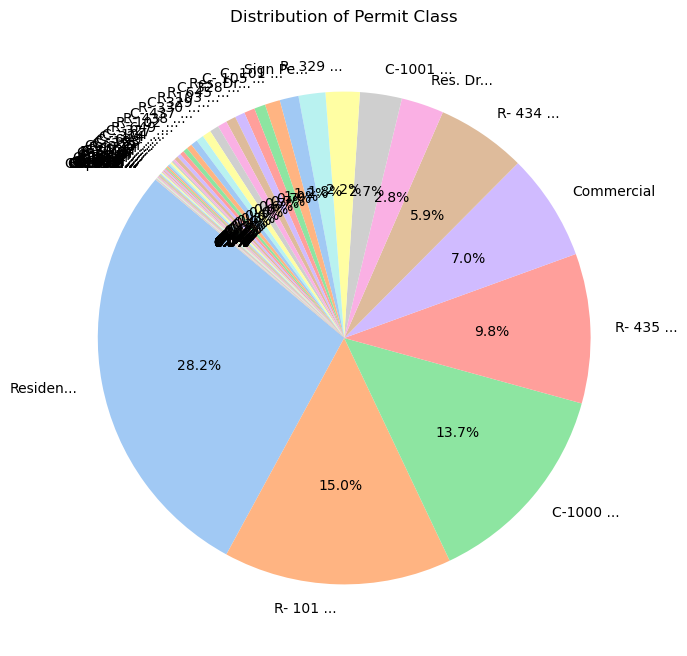

In [52]:
# Abbreviate Labels for permit class
abbreviated_labels = [label if len(label) <= 10 else label[:7] + '...' for label in permit_class_counts.index]

plt.figure(figsize=(10, 8))
plt.pie(permit_class_counts, labels=abbreviated_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Permit Class')
plt.show()


### 3. Count Plot of Categorical Features

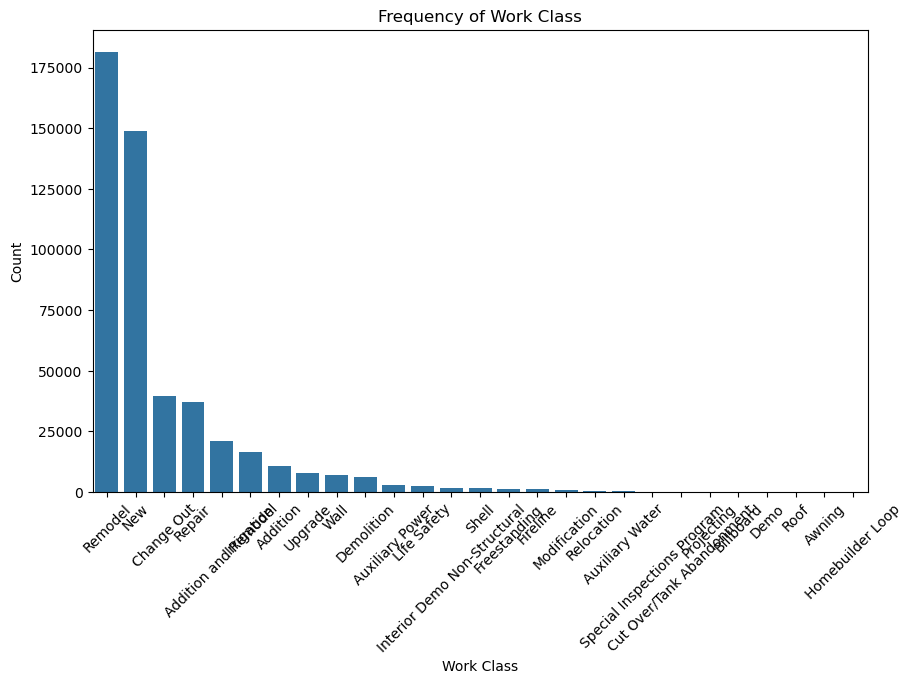

In [42]:
# Count Plot for 'Work Class'
plt.figure(figsize=(10, 6))
sns.countplot(data=construction_permits_df, x='Work Class', order=construction_permits_df['Work Class'].value_counts().index)
plt.title('Frequency of Work Class')
plt.xticks(rotation=45)
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.show()


### 4. Horizontal Bar Plot of Permit Type Frequencies


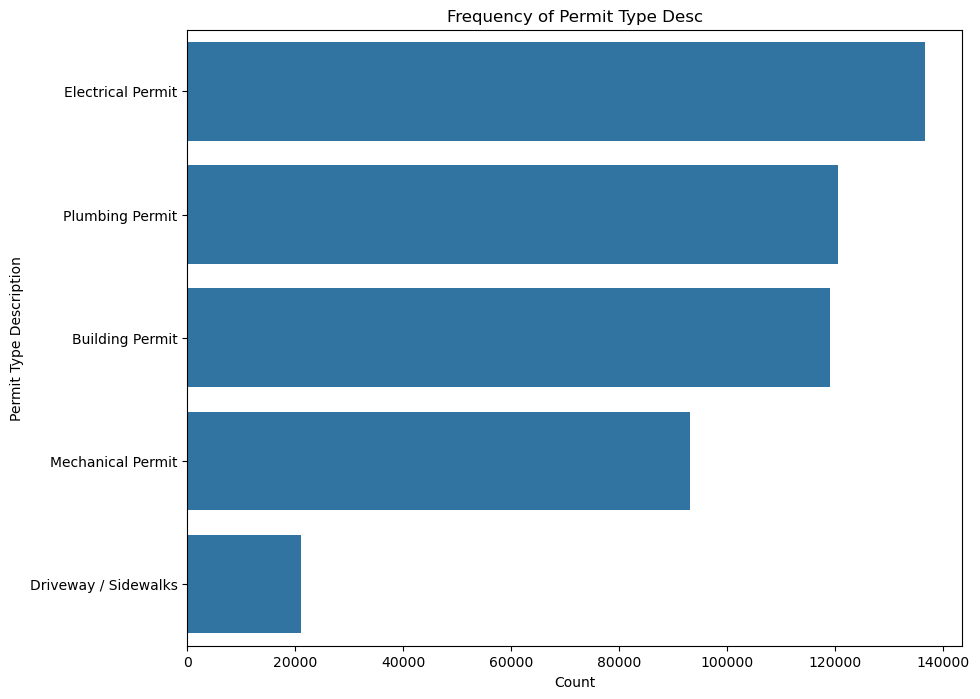

In [44]:
# Horizontal Bar Plot for 'Permit Type Desc'
plt.figure(figsize=(10, 8))
sns.countplot(data=construction_permits_df, y='Permit Type Desc', order=construction_permits_df['Permit Type Desc'].value_counts().index)
plt.title('Frequency of Permit Type Desc')
plt.xlabel('Count')
plt.ylabel('Permit Type Description')
plt.show()


### 5. Horizontal Bar Plot of Permit Type Frequencies


/tmp/ipykernel_6163/4197753072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=construction_permits_df, y='Permit Type Desc', order=construction_permits_df['Permit Type Desc'].value_counts().index, palette='coolwarm')


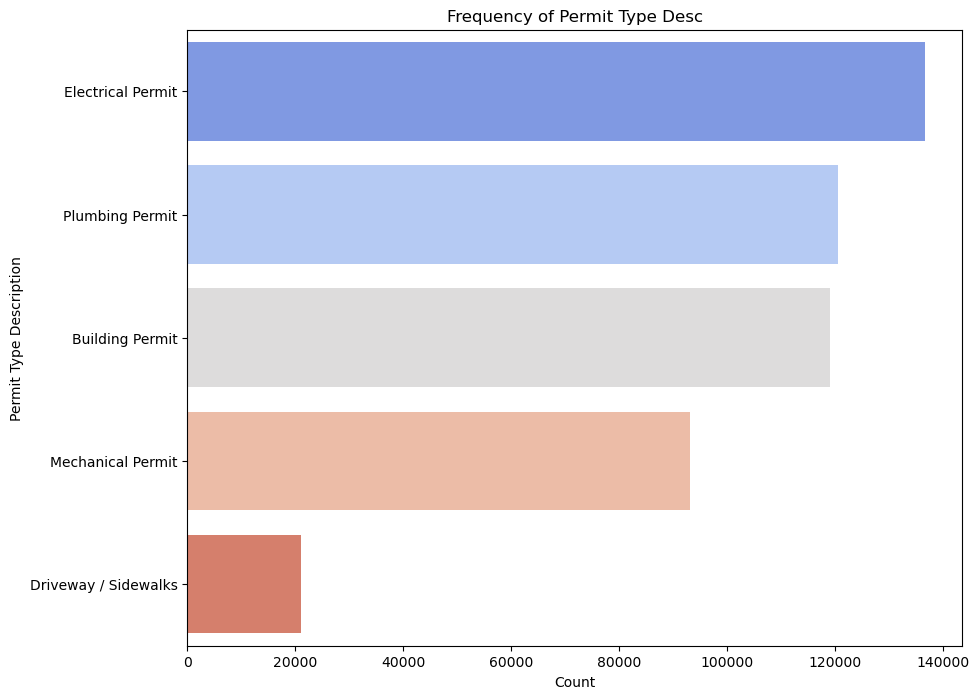

In [49]:
# . Horizontal Bar Plot for 'Permit Type Desc'
plt.figure(figsize=(10, 8))
sns.countplot(data=construction_permits_df, y='Permit Type Desc', order=construction_permits_df['Permit Type Desc'].value_counts().index, palette='coolwarm')
plt.title('Frequency of Permit Type Desc')
plt.xlabel('Count')
plt.ylabel('Permit Type Description')
plt.show()
